## Normal Distribution
In this notebook, we are going to discuss about normal distribution and Standard Normal Distribution. 
*Normal Distribution*: Normal distribution is most common type of continuous probability distribution which also known as Gaussian Distribution. When we are visualizing or plotting a sample of normal random variables, it always gives a symmetric graph which highest mean value. 

For performing the experiment we are taking some random sample data. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as S
%matplotlib inline

I am using numpy for taking normal distributed random data. Later i will implement Inverse Transform Sampling to show how numpy generate random data. 
Let's take a example of *Population's BMI (Body Mass Index)*. I am going to take bmi values for population. which always ranging from 18.5 to 25 $kg/m^2$. 
Taking a sample of 1000 people. N = 1000
With a random mean of 22. $\mu = 22$ and standard deviation of 2. $\sigma = 2$.


In [2]:
N = 1000
mu = 22
sigma = 2

In [3]:
#Let's generate random data.
sample_data = np.random.normal(loc = mu, scale = sigma, size = N)

In [4]:
sample_data

array([21.79329116, 24.97551139, 21.07148119, 24.31855219, 22.93829755,
       21.92719786, 23.14450734, 24.40966609, 24.13156801, 23.04442933,
       25.08369881, 21.31872879, 24.07710841, 21.3925978 , 20.23856043,
       23.57471344, 20.28568493, 19.79302065, 22.68931364, 23.45669278,
       20.12016089, 25.06593044, 20.79896198, 24.0006755 , 18.034057  ,
       21.61875622, 20.91918407, 24.09439937, 23.31724855, 18.60698045,
       20.6718334 , 22.18212666, 24.50463282, 23.28664376, 21.99678857,
       22.40344639, 26.13647247, 16.73594584, 20.00257202, 23.52448082,
       23.47998772, 22.00925532, 23.84170979, 23.02631197, 22.45737499,
       24.31543308, 22.65323592, 23.84078562, 24.32970809, 24.12456445,
       24.44956657, 20.14157902, 22.48286487, 22.97818405, 20.46909219,
       21.74006655, 21.12986467, 22.4607151 , 22.35993245, 21.47182037,
       20.28271436, 23.38774368, 22.35156591, 22.11492291, 19.93200765,
       20.64994037, 24.95760353, 21.31710229, 20.62433026, 23.96

Text(0, 0.5, 'Frequency')

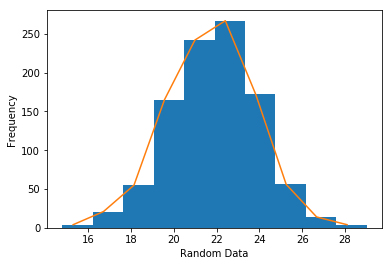

In [5]:
##Here i got the data. 
a, b, c = plt.hist(sample_data, bins = 10)
plt.plot(b[:-1] + 0.5, a)
plt.xlabel('Random Data')
plt.ylabel('Frequency')

To calculate the probability for any normally distribution data. The proability Distribution function is given by:
   $$P(X = x_i) = \frac{1}{\sqrt{2\pi} \sigma} e^{-{\frac{{(x_i - \mu)} ^ 2}{2\sigma^2} }}$$
   
It could also be written as:
$$P(X = x_i) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2}\big[{\frac{{x_i - \mu}}{\sigma} }\big] ^ 2}$$

Where $\mu$ and $\sigma$ is the natural parameters of the probability distribution. Changing the values of $\sigma$ and $\mu$ will give a family of *Gaussian curves*. 
<br>When we change the values of $\mu$ it will change the values on $x-axis$. When $\mu$ is negative the graph is shifted towards negative side or vice versa. <br>But, when we change the values of $\sigma$ it will change the graph on $y-axis$. When we increase the value of $\sigma$, graph will shrink from $y-axis$ or vice versa. <br>
There is a direct relation between $x-axis$ and $\mu$ but, inverse relations between $y-axis$ and $\sigma$.
<br>$\frac{1}{\sqrt{2\pi}\sigma}$ is the scaling value which will help in reducing the probability of center value and distribute among other values. 
And, $\bigg(-{\frac{{x_i - \mu} ^ 2}{2\sigma^2}} \bigg)$ will use to shift the graph over $x-axis$. 


To find the probability of we can use the distribution function. 
In our example, we took $\mu$ = 22 and $\sigma$ = 2. Let's find the value of $P(X = 24)$

In [25]:
# Writing a function to calculate the probability. 
def Normal_PDF(x, mu, sigma):
    scale_parm = 1 / (np.sqrt(2 * np.pi) * sigma)
    shift = np.e ** (((x - mu) ** 2) / (2 * sigma ** 2))
    return scale_parm * shift


In [26]:
x = 24
mu = 22
sigma = 2
individual_prob = Normal_PDF(x, mu, sigma)
print ("Individual probability of {} is {}".format(x, individual_prob))

Individual probability of 24 is 0.3288723117397285


Now, we are going to calculate the Cummulative probability function for normal distribution. 
As, we know in continuous random variable the porbability is calculated by:
$$f(x) = \int_{i = -\infty}^{\infty} P(X=x_i) dx$$
So, change $P(X = x_i)$ wil probability function. 
$$ f(x) = \int_{i = -\infty}^{\infty} {\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2}\big[{\frac{{x_i - \mu}}{\sigma} }\big] ^ 2}} dx$$

But it will be computationally complicated to calculate the integral of a normal distributed function.<br>To solve the probable scientists introduce a table. Where integral for particular value is already calculated. But still have some problem, in our case we are finding probability for BMI which have the unit value $kg/m^2$. But when we can the example then we get unit in different values. To solve that problem scientist create standardized form of the same distribution. By which it become more easy to solve the problem.  
To standardize the values scientists give an equation:
$$z = \frac{x-\mu}{\sigma}$$ 
This equation will help to find the *z-score* for every normalized random variable. It compress the variable into a range of $[-4, 4]$. It also known as *zero mean one standard deviation score*.<br>And scientist calculate integrals for all values of that range. They created a table called <a href = "http://www.z-table.com/" >Z-score table. </a>

<img src = "http://www.z-table.com/uploads/2/1/7/9/21795380/7807141_orig.png" height = "50" width = "200"/>
In integration we find the value of from minimum value to a particular value. As shown in shaded region. 

In [8]:
# In python, to get z-score we use function of scipy library
#Let's calculate the z-score for our indiviual probability. Before finding the z-score we have standardize our x-value.

x = 24
mu = 22
sigma = 2

In [9]:
calc_zscore = lambda x,mu,sigma: (x-mu) / sigma

In [10]:
z_score = calc_zscore(18.5, mu, sigma)

In [11]:
z_score

-1.75

Now we can calculate cummulative distribution function for that Value. 

In [12]:
ProbabilityForXValue = S.norm.cdf(z_score)

In [13]:
ProbabilityForXValue

0.040059156863817086

We can also find the probability in between an interval. For e.g., In our BMI example, let's say i want to find the probability of a person having BMI in between 20 to 23. 
So, basically we have to find $ F(X \geq 20 \hspace{1mm}\&\hspace{1mm} X \leq 23) $. 
As, we know the from $z-score$ we can able to find the probability from minimum to a specific value. 
So, there we can subtract the probability of largest value with smallest we can get the probability of that region. 
$$F(X \geq20 \hspace{1mm}\&\hspace{1mm}X\leq23) = F(X = 23) - F(X = 20)$$

In [14]:
## So first we have to find the standardize our values. 
x1, x2 = [20,23]
x1, x2

(20, 23)

In [15]:
x1_zscore = calc_zscore(x1, mu, sigma)
x2_zscore = calc_zscore(x2, mu, sigma)
(x1_zscore, x2_zscore)

(-1.0, 0.5)

In [16]:
## Find the cummulative probability of random variable. 
x1_cdf = S.norm.cdf(x1_zscore)
x2_cdf = S.norm.cdf(x2_zscore)
x1_cdf, x2_cdf

(0.15865525393145707, 0.6914624612740131)

In [17]:
## Subtract to find the probability of that region. 
region_prob = x2_cdf - x1_cdf
region_prob

0.532807207342556

So, The $F(X \geq20 \hspace{1mm}\&\hspace{1mm}X\leq23) = 0.5328$. Similarly, we can find probability for any specific region. 

Similarily, Probability distribution for standard normal variable is given as:
$$ P(X = x_i) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x_i^2} $$

## Inverse Transform Sampling

It is a sampling method, where we generate pseduo-random number for a particular any probability distribution. For Normal distribution, we can generate random(artifical) data for given mean($\mu$) and standard deviation($\sigma$). 
We are going to implement this method

In [18]:
## it need 3 parameters (mean, standard deviation, size)
## Return a array of normally distributed random numbers.

def inverse_transform_sampling(mean, sigma, size):
    prob_val = np.random.uniform(0,1,size).astype(float)
    z_score = S.norm.ppf(prob_val)
    random_values = mean - (z_score * sigma)
    return random_values

In [23]:
value = inverse_transform_sampling(22,2,(1000)).astype(float)

(array([0.00070969, 0.00709691, 0.03335547, 0.10290517, 0.15755136,
        0.19161651, 0.14193816, 0.05322681, 0.01632289, 0.00496784]),
 array([14.64204775, 16.05111211, 17.46017646, 18.86924082, 20.27830517,
        21.68736953, 23.09643388, 24.50549824, 25.9145626 , 27.32362695,
        28.73269131]),
 <a list of 10 Patch objects>)

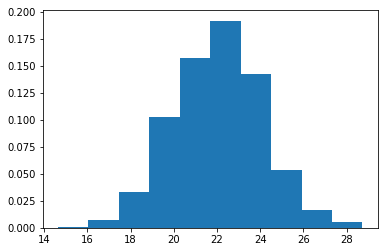

In [24]:
plt.hist(value,density = True, )

## Chevyshev's inequality
Chevyshev's inequality is inequality where we find the area covered by some number. 
So, $$x = \mu \pm k\sigma$$
To find the total area covered by the particular $k$ value.
$$Area Covered = \bigg( 1 - \frac{1}{k^2}\bigg)$$

Probability distribution for standard normal distribution is:
$$P(Z = z_i) = {\frac{1}{\sqrt{2\pi}\sigma} e^z^2}$$